IMPORT 

In [37]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

READ CSV FILES

In [38]:
games = pd.read_csv('games.csv')
player = pd.read_csv('player_names.csv')
pitches = pd.read_csv('pitches.csv')
at_bats = pd.read_csv('atbats.csv')

HEAD OF EACH df

In [39]:
#games.head()

In [40]:
#player.head()

In [41]:
#pitches.head()

In [42]:
#at_bats.head()

CHECK DATA TYPES OF FILES

In [43]:
#games.dtypes

In [44]:
#player.dtypes

In [45]:
#pitches.dtypes

In [46]:
#at_bats.dtypes

In [47]:
#change pitches['ab_id'] to int because it is int in at_bats df
pitches['ab_id'] = pitches['ab_id'].astype(int) 

In [48]:
#rename the id in player df to batter_id because they are same as batter_id in at_bats df
player.rename(columns={'id':'batter_id'},inplace=True)
#pitches.head()

MERGE DOCUMENTS

In [49]:
df1 = pd.merge(pitches, at_bats,  how='left', left_on='ab_id', right_on = 'ab_id')
#df1.head()

In [50]:
df2 = pd.merge(df1, games, how ='left', left_on='g_id', right_on = 'g_id')
#df2.head()

In [51]:
df3 = pd.merge(df2,player, how='left', left_on='batter_id',right_on='batter_id')
#df3.head()

In [52]:
#concatinate the first name and last name
df3['Batter name'] = df3[['first_name','last_name']].apply(lambda x:''.join(x),axis=1)

In [53]:
#drop the first name and last name
df3.drop(['first_name','last_name'],axis=1,inplace=True)

In [54]:
player.rename(columns={'batter_id':'pitcher_id'}, inplace=True)

CREATE MASTER FILE

In [55]:
master = pd.merge(df3,player, how='left', left_on='pitcher_id',right_on='pitcher_id')
#master.head()

In [56]:
#concatinate the first name and last name 
master['pitcher_name'] = master[['first_name','last_name']].apply(lambda x:' '.join(x),axis=1)

CALCULATE ERA

In [57]:
master['pitch_type'] = master['pitch_type'].map({'FF': 'Four Seam Fastball', 'SL': 'Slider', 'FT': 'Two seam fastball', 'CH': 'Changeup', 'SI': 'Sinker', 'CU': 'Curveball', 'FC': 'Cutter', 'KC': 'Knuckle Curve', 'FS': 'Splitter','KN': 'Knuckleball', 'EP': 'Eephus', 'FO': 'Pitch Out', 'PO': 'Pitch Out', 'SC': 'Screwball', 'UN': 'Unidentified', 'FA': 'Fastball', 'IN': 'Intentional Ball'})

In [58]:
#master['pitch_type']

In [59]:
#creating the legend corresponding the the pitch_type
master['code'] = master['code'].map({'B': 'Ball', '*B': 'Ball in dirt', 'S': 'Swinging Strike', 'C': 'Called Strike', 'F': 'Foul', 'T': 'Foul Tip', 'L': 'Foul Bunt', 'I': 'Intentional Ball', 'W': 'Blocked','M': 'Missed Bunt', 'P': 'Pitch Out', 'Q': 'Swinging Pitch Out', 'R': 'Foul Pitch Out', 'X': 'In play out(s)', 'D': 'In play no out', 'E': 'In play runs'})

In [60]:
#group the pitcher counts by pitcher name and s_count
pitcher_group = master.groupby(['pitcher_name'])[['s_count']].sum()

In [61]:
ERA = pitcher_group.s_count / len(master)

In [69]:
ERA.sort_values(ascending=False)

pitcher_name
Max Scherzer        4.558876e-03
Justin Verlander    4.323102e-03
Chris Sale          4.259276e-03
Jose Quintana       4.195798e-03
Chris Archer        4.044429e-03
                        ...     
Phillip Ervin       3.487779e-07
Mark Reynolds       0.000000e+00
Tyler Moore         0.000000e+00
Anthony Rizzo       0.000000e+00
Alexi Amarista      0.000000e+00
Name: s_count, Length: 1330, dtype: float64

In [91]:
#create a seperate varable to pull his name out
Ryan = master[master['pitcher_name']=='Ryan Pressly']
Ryan.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,umpire_3B,umpire_HP,venue_name,weather,wind,delay,Batter name,first_name,last_name,pitcher_name
103382,-0.641,2.141,94.1,85.7,2229.532,190.205,12.7,2.9,23.7,-3.750,...,Marvin Hudson,Chad Fairchild,Target Field,"76 degrees, partly cloudy","4 mph, In from RF",0,JBShuck,Ryan,Pressly,Ryan Pressly
103383,1.713,1.465,93.2,85.1,2288.025,189.012,6.0,2.9,23.7,-3.363,...,Marvin Hudson,Chad Fairchild,Target Field,"76 degrees, partly cloudy","4 mph, In from RF",0,JBShuck,Ryan,Pressly,Ryan Pressly
103384,0.024,2.511,94.7,86.8,2177.750,228.377,35.0,5.1,23.8,-15.548,...,Marvin Hudson,Chad Fairchild,Target Field,"76 degrees, partly cloudy","4 mph, In from RF",0,JBShuck,Ryan,Pressly,Ryan Pressly
103385,-1.035,3.009,95.1,86.6,1940.007,187.651,7.3,3.2,23.7,-2.481,...,Marvin Hudson,Chad Fairchild,Target Field,"76 degrees, partly cloudy","4 mph, In from RF",0,MelkyCabrera,Ryan,Pressly,Ryan Pressly
103386,0.410,2.843,94.7,86.9,2105.800,184.932,2.2,2.8,23.8,-1.730,...,Marvin Hudson,Chad Fairchild,Target Field,"76 degrees, partly cloudy","4 mph, In from RF",0,MelkyCabrera,Ryan,Pressly,Ryan Pressly


In [96]:
#percent of pitch types by him
Ryan['pitch_type'].value_counts() / len(Ryan)*100

Four Seam Fastball    42.744135
Slider                25.750136
Curveball             22.449536
Two seam fastball      7.364975
Intentional Ball       0.300055
Changeup               0.190944
Name: pitch_type, dtype: float64

In [93]:
#percent of events that happend off his pitches
Ryan['event'].value_counts() / len(Ryan) * 100

Strikeout              31.696672
Groundout              14.948172
Single                 13.966176
Flyout                 10.147300
Walk                   10.065466
Lineout                 4.773595
Double                  3.600655
Pop Out                 2.482270
Home Run                2.209493
Forceout                1.418440
Intent Walk             1.009274
Grounded Into DP        0.818331
Field Error             0.818331
Sac Fly                 0.436443
Hit By Pitch            0.436443
Sac Bunt                0.409165
Triple                  0.245499
Double Play             0.218221
Runner Out              0.109111
Fielders Choice Out     0.109111
Batter Interference     0.081833
Name: event, dtype: float64

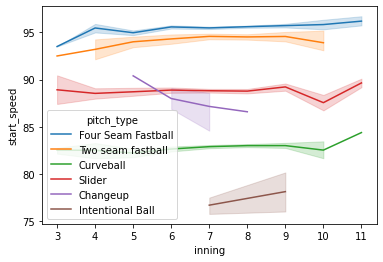

In [94]:
Ryan_pressly = sns.lineplot(x="inning", y="start_speed", hue="pitch_type", data=Ryan)

In [95]:
#create a seperate varable to pull his name out
Justin = master[master['pitcher_name']=='Justin Verlander']

In [97]:
#percent of pitch types by him
Justin['pitch_type'].value_counts() / len(Justin)*100

Four Seam Fastball    58.681886
Slider                19.834258
Curveball             15.385818
Changeup               5.511688
Cutter                 0.265812
Two seam fastball      0.093816
Intentional Ball       0.046908
Pitch Out              0.015636
Name: pitch_type, dtype: float64

In [98]:
#percent of events that happend off his pitches
Justin['event'].value_counts() / len(Justin) * 100

Strikeout              33.898835
Flyout                 12.196075
Groundout              11.773904
Single                 10.726292
Walk                    9.037605
Pop Out                 7.231647
Lineout                 4.878430
Double                  3.283559
Home Run                2.603393
Grounded Into DP        0.797436
Forceout                0.680166
Hit By Pitch            0.672348
Sac Fly                 0.492534
Field Error             0.422172
Triple                  0.383082
Intent Walk             0.187632
Runner Out              0.140724
Fielders Choice Out     0.117270
Sac Bunt                0.109452
Double Play             0.101634
Strikeout - DP          0.093816
Fielders Choice         0.062544
Batter Interference     0.046908
Bunt Pop Out            0.039090
Bunt Groundout          0.023454
Name: event, dtype: float64

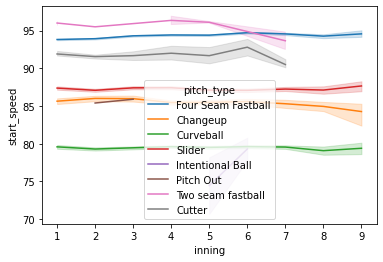

In [99]:
Justin_Verlander = sns.lineplot(x="inning", y="start_speed", hue="pitch_type", data=Justin)